In [1]:
import h5py
import numpy as np

from llama.load_test_data import load_cSAXS_data, load_downsampled_cSAXS_data
from llama.api.options.projections import ProjectionOptions
from llama.api.options.task import AlignmentTaskOptions
from llama.task import LaminographyAlignmentTask
from llama.projections import ComplexProjections, PhaseProjections
import llama.image_processing as ip
from llama.plotting import plotters
import llama.gpu_utils as gutils

import matplotlib.pyplot as plt
reconstruction_colormap = "bone"

gutils.turn_off_fft_cache()

In [2]:
complex_projections, angles, weights = load_cSAXS_data(load_weights=True)
# complex_projections, angles = load_downsampled_cSAXS_data(8)

In [3]:
# # Sort inputs
# idx_sort = np.argsort(angles)
# angles = angles[idx_sort]
# complex_projections = complex_projections[idx_sort]

projection_options = ProjectionOptions()
complex_projections = ComplexProjections(complex_projections, angles, projection_options)
complex_projections.pin_projections()
complex_projections.masks = weights

task_options = AlignmentTaskOptions()
task = LaminographyAlignmentTask(complex_projections, task_options)

### Get cross-correlation shift

In [ ]:
from llama.api.options.device import GPUOptions
from llama.api.enums import DeviceType
task_options.cross_correlation.iterations = 10
task_options.cross_correlation.device.device_type=DeviceType.GPU
n_gpus = 1
task_options.cross_correlation.device.gpu = GPUOptions(
    chunking_enabled=True,
    chunk_length=20,
    n_gpus=n_gpus,
    gpu_indices=[i for i in range(n_gpus)],
)

crop_range = 32 * 30
# crop_range = 128
task_options.cross_correlation.crop_options.enabled = True
task_options.cross_correlation.crop_options.horizontal_range = crop_range
task_options.cross_correlation.crop_options.vertical_range = crop_range

Iteration 0
Iteration 1
Iteration 2
Iteration 3
Iteration 4
Iteration 5
Iteration 6
Iteration 7
Iteration 8
Iteration 9
Cross-correlation shift stored in shift_history


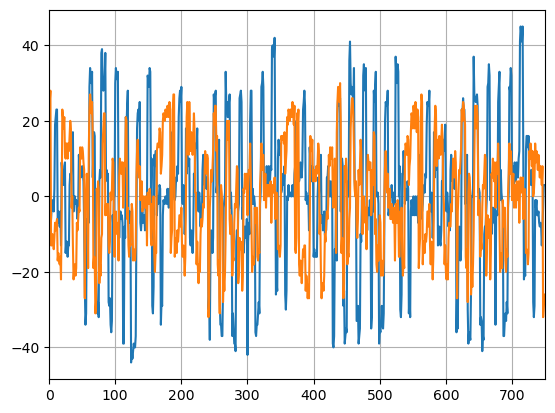

In [ ]:
task.get_cross_correlation_shift()
plt.plot(task.shift_manager.staged_shift[np.argsort(angles)])
plt.grid()
plt.xlim([0, len(angles)])
plt.show()
task.apply_staged_shift()

### Get Mask
TBD

In [ ]:
task.get_complex_projection_masks(enable_plotting=True)

In [ ]:
plotters.make_image_slider_plot(complex_projections.masks)

### Phase unwrapping